In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import os
def movie(outpath):
    outpath = "/g/data/v45/ab8992/dropbox/regional_movies/" + outpath
    subprocess.run(f"ffmpeg -framerate 20 -pattern_type glob -i 'frame*.png' -s 1500x1200 -c:v libx264 -pix_fmt yuv420p '{outpath}.mp4'",cwd = "/scratch/v45/ab8992/tmp/movies",shell=True)

    if os.path.exists(outpath):
        subprocess.run("mv frame* backup/",cwd = "/scratch/v45/ab8992/tmp/movies")
from xmovie import Movie 

# from dask.distributed import Client
# client = Client()
# client

## Make some movies of TTide model runs! 

In [3]:
v = xr.open_mfdataset("/home/149/ab8992/mom6_rundirs/ttide/blank-ttide-20/archive/output006/*hourly_v.nc",decode_times = False, parallel = True,chunks = "auto").isel(rho2_l = 5).sel(xh = slice(145,175),yq = slice(-52,-30))
v

<xarray.Dataset>
Dimensions:  (xh: 600, yq: 584, rho2_i: 80, time: 120)
Coordinates:
  * xh       (xh) float64 145.0 145.1 145.1 145.2 ... 174.8 174.9 174.9 175.0
  * yq       (yq) float64 -52.0 -51.96 -51.92 -51.89 ... -30.08 -30.04 -30.0
    rho2_l   float64 1.036e+03
  * rho2_i   (rho2_i) float64 1.036e+03 1.036e+03 ... 1.037e+03 1.037e+03
  * time     (time) float64 2.123e+05 2.123e+05 ... 2.124e+05 2.124e+05
Data variables:
    v        (time, yq, xh) float32 dask.array<chunksize=(33, 118, 154), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          eac
    grid_type:      regular
    grid_tile:      N/A

## Movie of speed from internal layer

In [43]:
SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

expt = "testtides-20"
movietitle = "hourly_deepspeed-mixed.mp4"

v = xr.open_mfdataset(f"/home/149/ab8992/mom6_rundirs/ttide/{expt}/archive/output005/*hourly_v.nc",decode_times = False, parallel = True,chunks = "auto").isel(rho2_l = 40).sel(xh = slice(145,175),yq = slice(-52,-30))
u = xr.open_mfdataset(f"/home/149/ab8992/mom6_rundirs/ttide/{expt}/archive/output005/*hourly_u.nc",decode_times = False, parallel = True,chunks = "auto").isel(rho2_l = 40).sel(xq = slice(145,175),yh = slice(-52,-30))


def speedplot(data,fig,tt,framedim = "time",**kwargs):

    ax = fig.subplots(1)


    data.isel(time = tt).plot(cmap = "seismic",vmin = 0,vmax = 0.25)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Speed at 1036kh/m3 isopycnal")
    return



speed = np.sqrt((v.interp({"yq":u.yh.values}).rename({"yq":"yh"})**2).v + (u.interp({"xq":v.xh.values}).rename({"xq":"xh"})**2).u).load()

speed = speed.chunk({"time":1})



mov = Movie(speed,speedplot,input_check = False)
mov.save("/g/data/v45/ab8992/dropbox/regional_movies/" + movietitle,overwrite_existing = True,parallel = True,parallel_compute_kwargs=dict(scheduler="processes", num_workers=28))







/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Insertin

Movie created at hourly_deepspeed-mixed.mp4


## Speed at surface

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


Exception ignored in: <function CachingFileManager.__del__ at 0x1502ac280ca0>
Traceback (most recent call last):
  File "/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/backends/file_manager.py", line 249, in __del__
    self.close(needs_lock=False)
  File "/home/149/ab8992/.local/lib/python3.9/site-packages/xarray/backends/file_manager.py", line 233, in close
    file.close()
KeyboardInterrupt: 
Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x150536f2c280>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

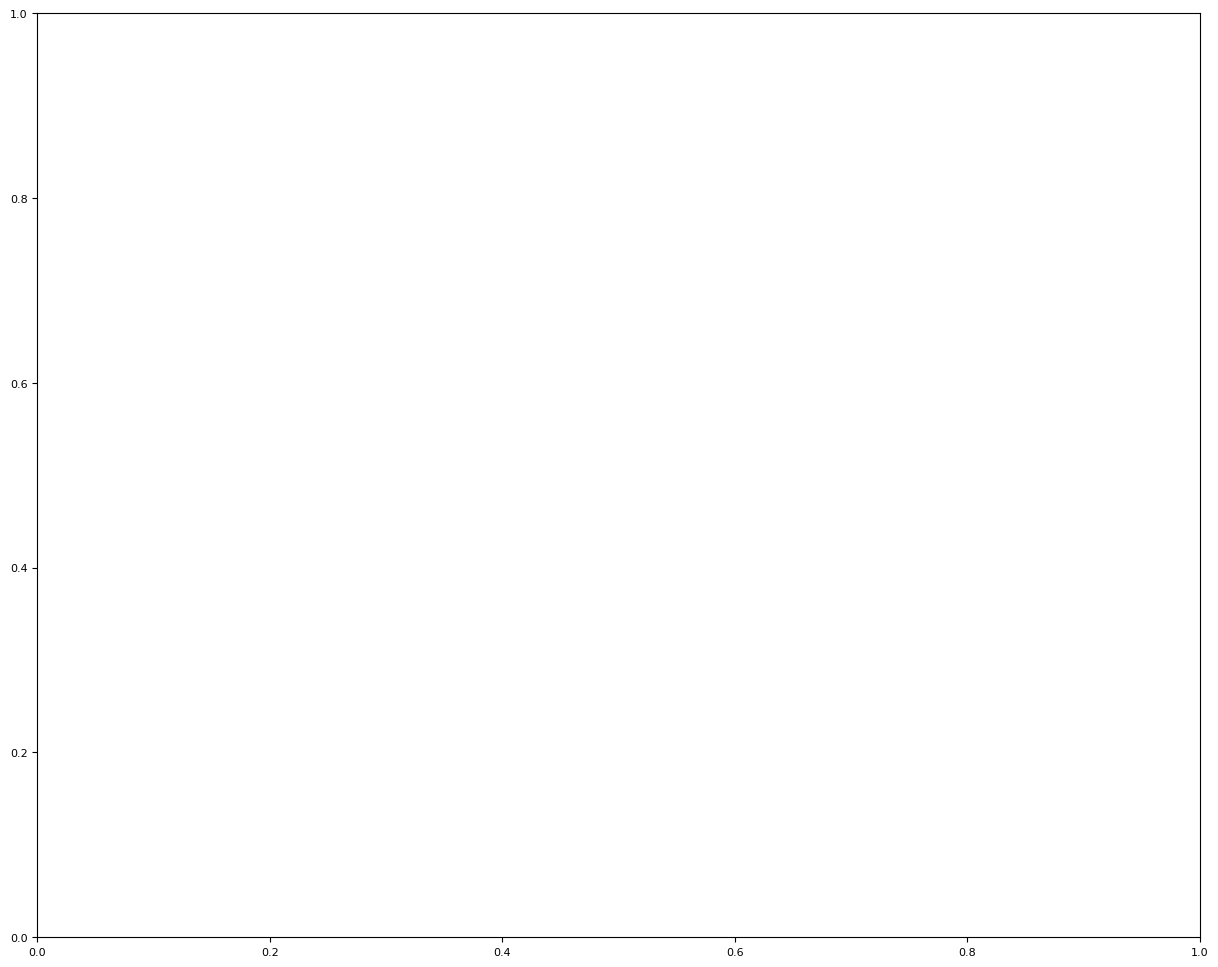

Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
2023-07-20 19:46:04,250 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/g/data/hh5/public/apps/miniconda3/

In [32]:

def speedmovie(path):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 20

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    speed = xr.open_mfdataset(path,decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30)).speed

    for i in range(speed.time.shape[0]):
        print(i)

        fig = plt.figure(figsize = (15,12))
        speed.isel(time = i).plot(cmap = "seismic")

        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title("Surface speed - with tidal forcing")
        plt.savefig(f"/scratch/v45/ab8992/tmp/movies/frame{0:03}".format(i))
        plt.close()



speedmovie(
    "/home/149/ab8992/mom6_rundirs/ttide/testtides-20/archive/output00*/*ocean_hourly.nc")
# movie("surfacespeed-fullforcing.mp4")



In [38]:
from xmovie import Movie 
SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figu


def speedplot(data,fig,tt,framedim = "time",**kwargs):

    ax = fig.subplots(1)


    data.isel(time = tt).plot(cmap = "seismic",vmin = 0,vmax = 2)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Daily Surface speed - with tidal forcing")
    return



speed = xr.open_mfdataset("/home/149/ab8992/mom6_rundirs/ttide/ttide-20/archive/output00*/*ocean_daily.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30)).speed.load()

speed = speed.chunk({"time":1})



mov = Movie(speed,speedplot,input_check = False)
mov.save("/g/data/v45/ab8992/dropbox/regional_movies/" + "dailyspeed-notides.mp4",overwrite_existing = True,parallel = True,parallel_compute_kwargs=dict(scheduler="processes", num_workers=28)) # ,parallel_compute_kwargs=dict(scheduler="processes", num_workers=10)



/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Insertin

Movie created at dailyspeed-notides.mp4


## Hourly surface height

In [25]:
def zosplot(data,fig,tt,framedim = "time",**kwargs):

    ax = fig.subplots(1)


    data.isel(time = tt).plot(cmap = "seismic",vmin = -0.5,vmax = 0.5)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Hourly Surface height - with tidal forcing")
    return


height = xr.open_mfdataset("/home/149/ab8992/mom6_rundirs/ttide/testtides-20/archive/output004/*ocean_hourly.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30)).zos.load()

height = height.chunk({"time":1})


mov = Movie(height,zosplot,input_check = False)
mov.save("/g/data/v45/ab8992/dropbox/regional_movies/" + "hourlyzos-blanktides.mp4",overwrite_existing = True,parallel = True,parallel_compute_kwargs=dict(scheduler="processes", num_workers=28)) # ,parallel_compute_kwargs=dict(scheduler="processes", num_workers=10)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Insertin

Movie created at hourlyzos-withtides.mp4


<Figure size 640x480 with 0 Axes>

## Daily surface height

In [27]:
def zosplot(data,fig,tt,framedim = "time",**kwargs):

    ax = fig.subplots(1)


    data.isel(time = tt).plot(cmap = "seismic",vmin = -0.5,vmax = 0.5)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Surface height - with tidal forcing")
    return


height = xr.open_mfdataset("/home/149/ab8992/mom6_rundirs/ttide/ttide-20/archive/output00*/*ocean_daily.nc",decode_times = False, parallel = True,chunks = "auto").sel(xh = slice(145,175),yh = slice(-52,-30)).zos.load()

height = height.chunk({"time":1})


mov = Movie(height,zosplot,input_check = False)
mov.save("/g/data/v45/ab8992/dropbox/regional_movies/" + "dailyzos-blanktides.mp4",overwrite_existing = True,parallel = True,parallel_compute_kwargs=dict(scheduler="processes", num_workers=28)) # ,parallel_compute_kwargs=dict(scheduler="processes", num_workers=10)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Inserting dummy values. This should not affect output. 
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.01/lib/python3.9/site-packages/xmovie/core.py:348: UserWarning: The provided `plotfunc` does not provide the expected number of output arguments.            Expected a function `ax,pp =plotfunc(...)` but got %i output arguments. Insertin

Movie created at dailyzos-withtides.mp4


In [24]:
%matplotlib inline
def zosplot(data,fig,tt,framedim = "time",**kwargs):

    ax = fig.subplots(1)


    data.isel(time = tt).plot(cmap = "seismic",ax = ax)
    print(data.isel(time = tt).values)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Hourly Surface height - with tidal forcing")
    fig.show()
    return
zosplot(height,fig,100)



[[-0.5283567  -0.52535284 -0.5237742  ... -0.74161917 -0.7563904
  -0.7700497 ]
 [-0.5056095  -0.5029588  -0.501239   ... -0.72789836 -0.74406016
  -0.75868726]
 [-0.48342174 -0.48077506 -0.47931835 ... -0.71291757 -0.7303904
  -0.74602795]
 ...
 [        nan         nan         nan ...  0.0321876   0.03596791
   0.03996041]
 [        nan         nan         nan ...  0.0387551   0.04225317
   0.04606408]
 [        nan         nan         nan ...  0.04478487  0.04842537
   0.05246999]]
